In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Carregar os dados
df_pinky = pd.read_csv(r'Original CSV\churn_telecom.csv')

# Visualizar as primeiras linhas do DataFrame
display(df_pinky.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
    # check stats
print(df_pinky.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [9]:
    # checking null values:
print(df_pinky.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [37]:
# Setting 'customerID' as index:
df_pinky.set_index('customerID', inplace=True)

In [23]:
    # Calculating "Churn" rate:
churn_rate = df_pinky['Churn'].value_counts(normalize=True)['Yes']
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 31.51%


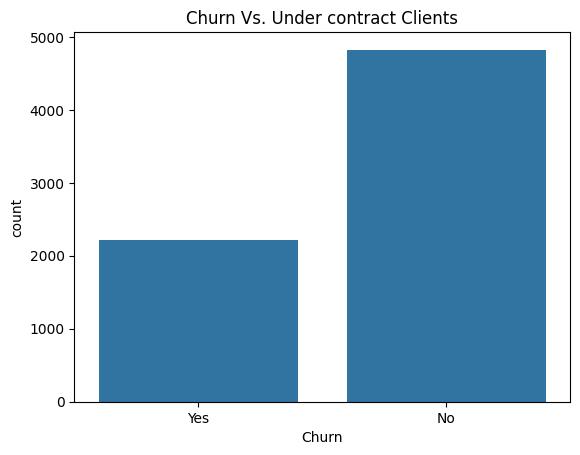

In [24]:
    # check distribution of target "Churn" in a simple way
sns.countplot(x='Churn', data=df_pinky)
plt.title('Churn Vs. Under contract Clients')
plt.show()

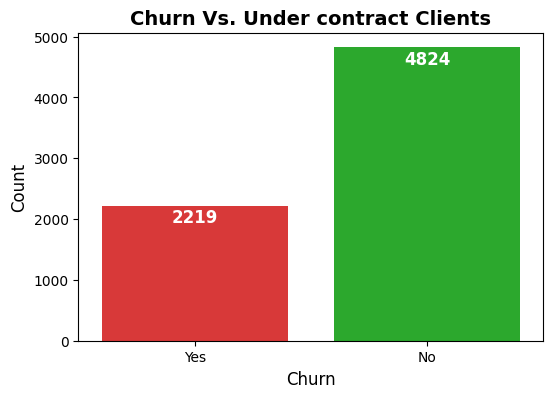

In [34]:
# Another way of observing the target "Churn" in a more readable way:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='Churn', data=df_pinky, hue='Churn', palette=['#f21f1f', '#17bd19'], legend=False)

# Adding labels inside the bars with the absolute values of each:
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold', color='white', padding=-15)

# Setting up the graph
plt.title('Churn Vs. Under contract Clients', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


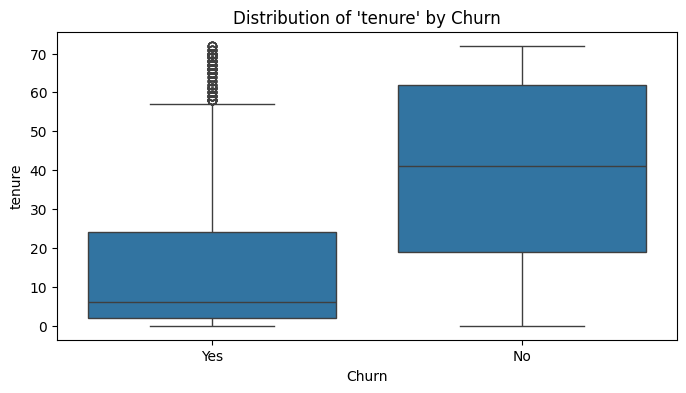

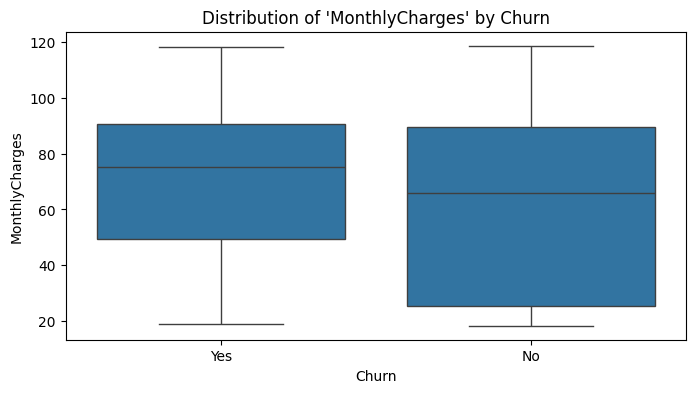

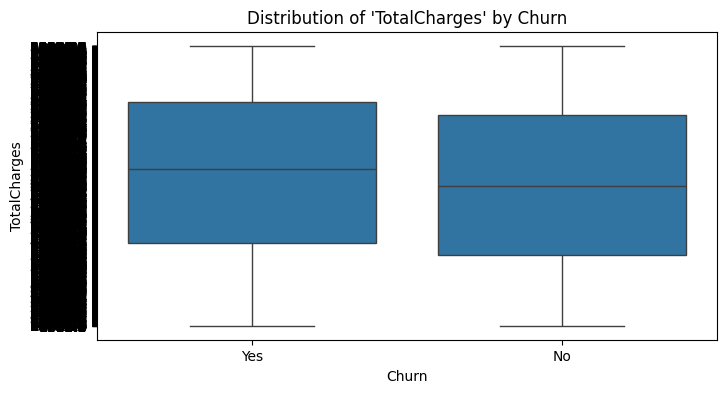

In [39]:
# Comparing numerical features:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=feature, data=df_pinky)
    plt.title(f"Distribution of '{feature}' by Churn")
    plt.show()


* Clients who left (churned) usually stay less time with a low median slightly under 10 months whicj might be correlated with "new clients packages bonus" and their end;
* Clients who stay show a majority of longer contracts with a median above 40 months and a lot with over 60 months (5 years);
* In the "churned" side we can observe some ouliers, representing a minority of clients who left after a long stay; 

* <u>TotalCharges values are very similar between "churned" and not "churned". The median for both is close with small differences in the above quartiles which is normal (more time under contract, more payment they did in total), so this feature is not so relevant for the "churn" rate;</u>

* The "MonthlyCharges" median is higher for "churned" clients;
* The volume of "churned" clients with higher payments (>75) is also higher while clients with lighter monthly payments are more likely to stay;
* Expensive contracts appear to be one of the problems for clients and might impact the threat of leaving, suggesting packages adapted to clients needs and payment capacity could help a keeping them;     


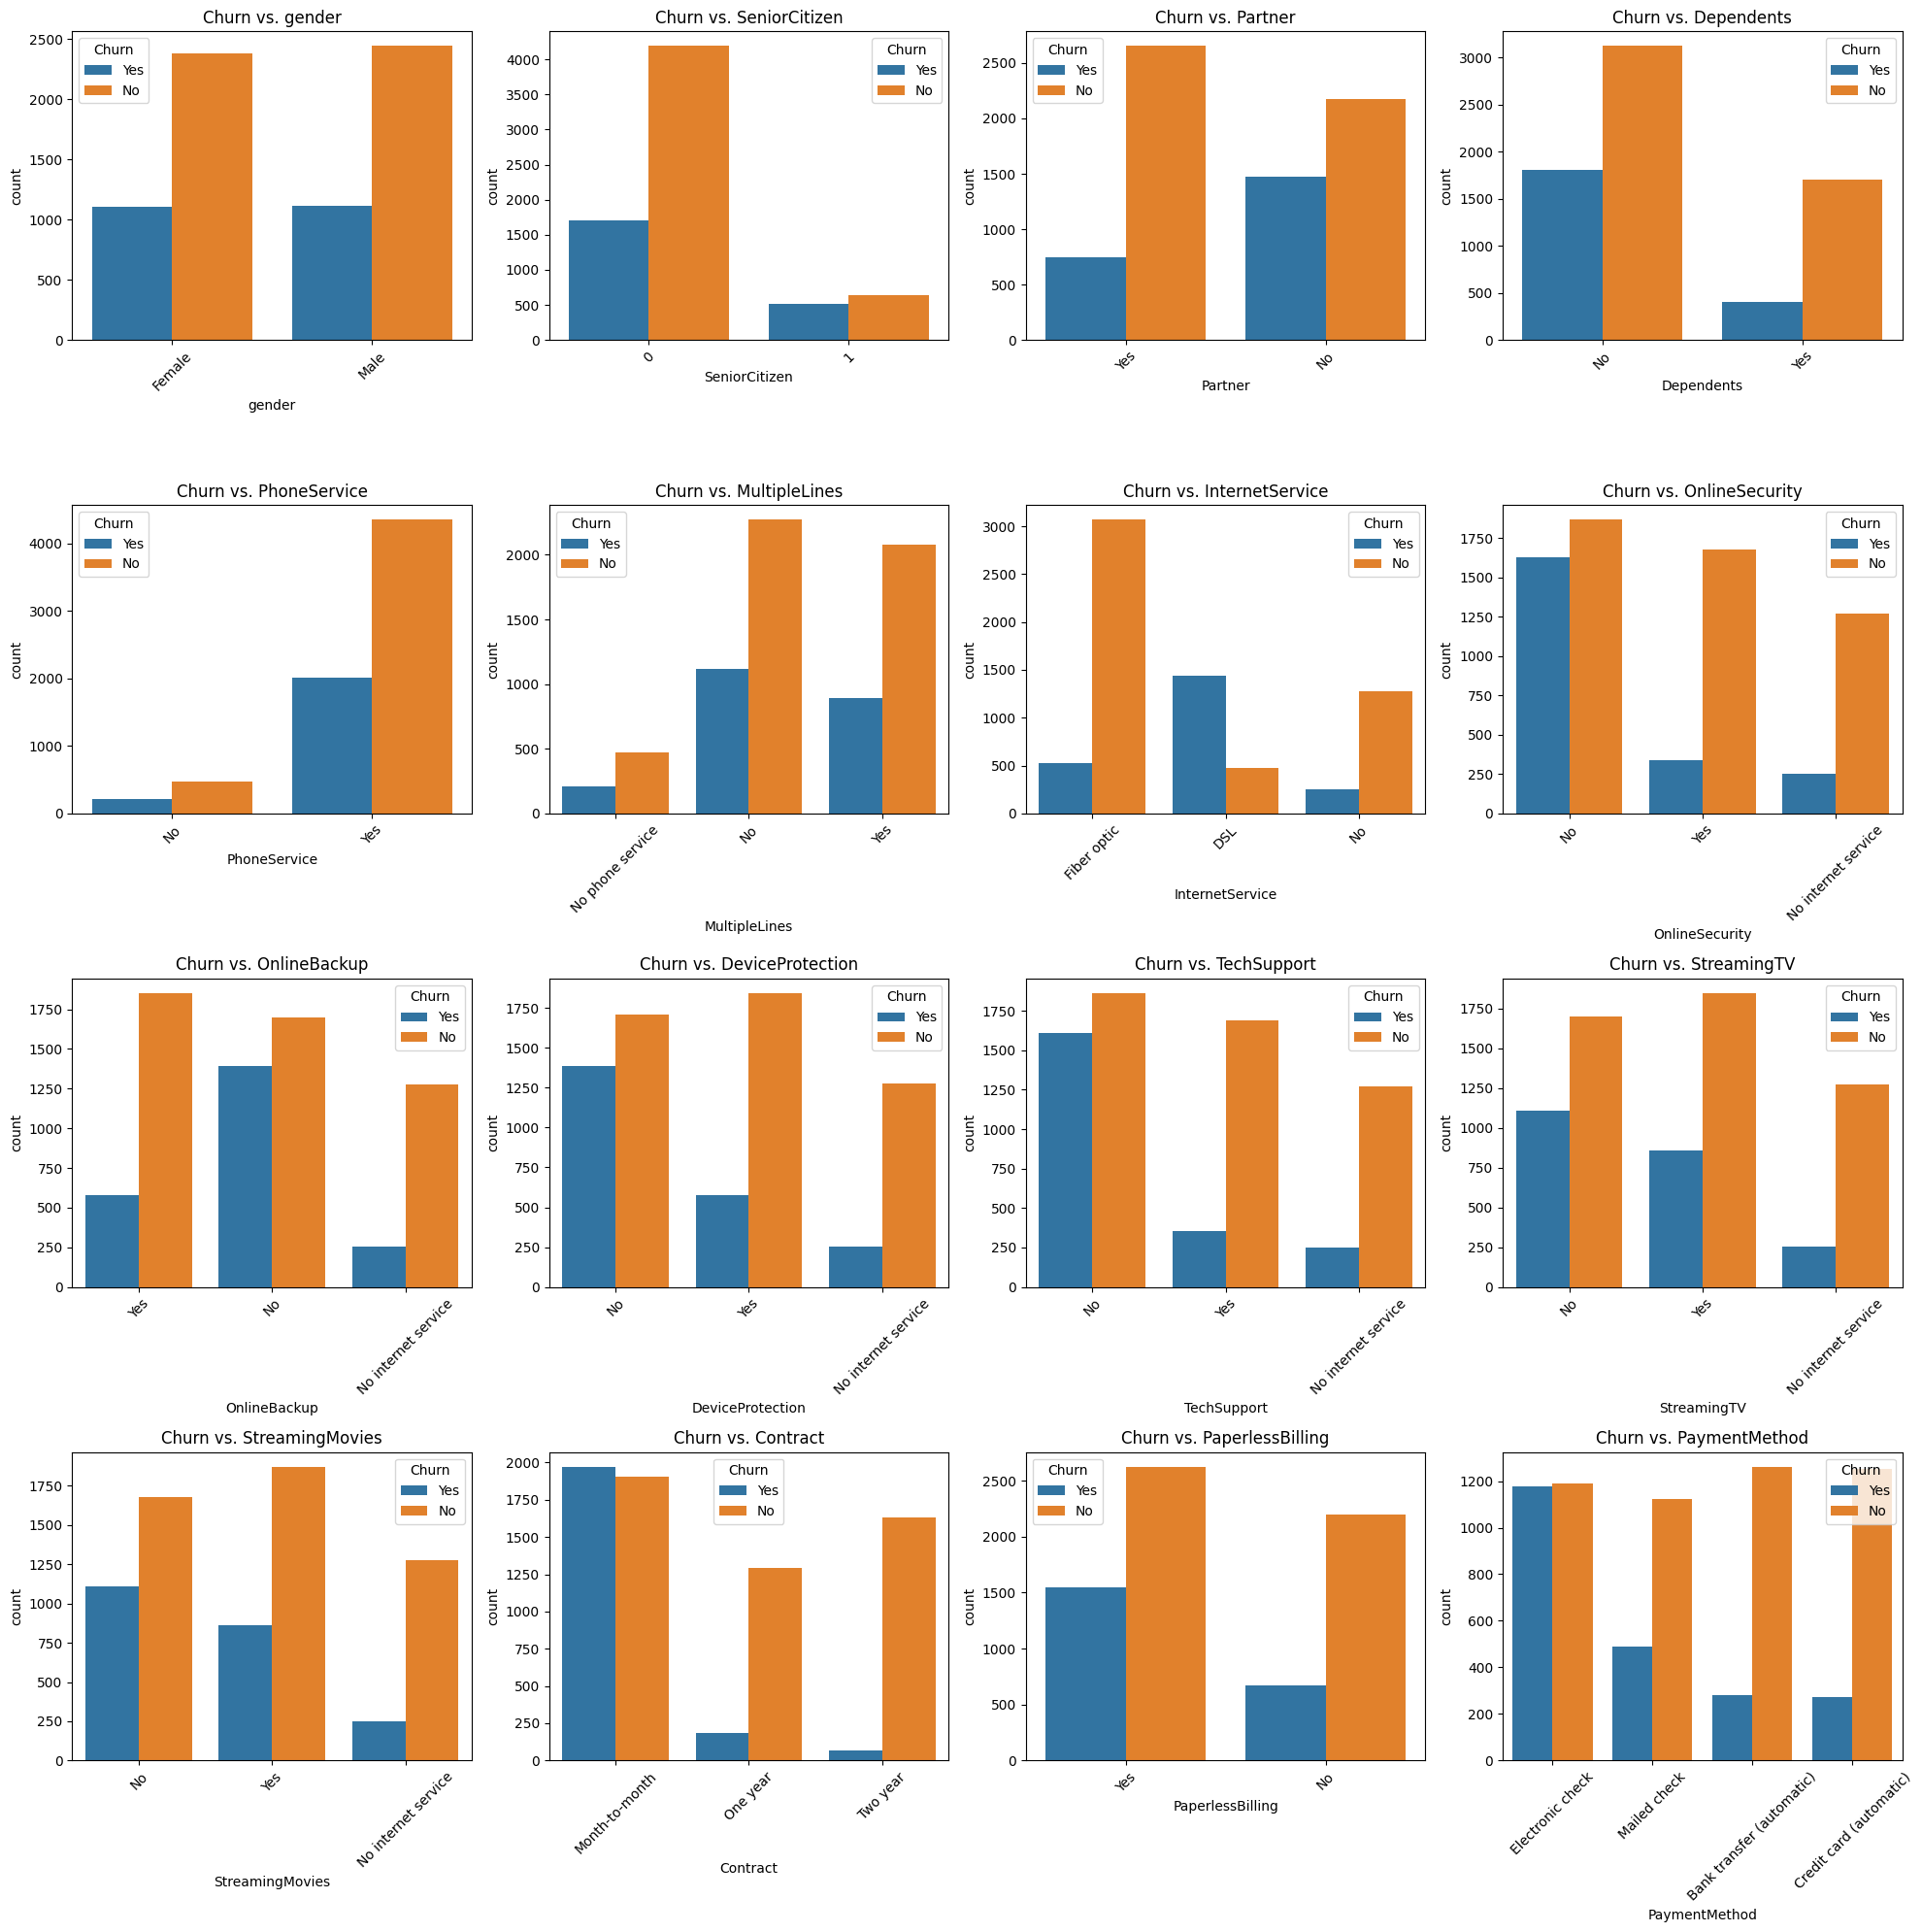

In [41]:
# List of categorical features:
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Setting the frame to accomodate the plots:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # 4x4 grid
axes = axes.flatten()  # Turns the axes matrix into a plane list:

# Loop to build the plots:
for i, var in enumerate(categorical_vars):
    if i < len(axes):   # assuring we don't surpasse the number of subplots;
        sns.countplot(data=df_pinky, x=var, hue="Churn", ax=axes[i])
        axes[i].set_title(f"Churn vs. {var}")
        axes[i].tick_params(axis="x", rotation=45)  # rotates labels in x;

# adjust layout to avoid "overflood":
plt.tight_layout()
plt.show()

* <u>Gender: doesn't seem to have a major impact in the Churn rate;</u>
* SeniorCitizen: Clients under 65 are the vast majority but the seniors (>65 years old) seem to be proportionally more open to leave;
* Clients with "no partner" seems more open to leave which can tell us that having someone to share the bills can benefit longer stays;  
* Clients with dependents (kids for example) are more willing to stay that the clients with no dependents;
* Almost all the clients have "PhoneService" so this might not be a good "churn" measure;
* Clients with "PhoneService" and "MultipleLines" have less "churn" maybe because of dependency between contracts;
* Clients with "InternetService" with "ADSL" are a lot more willingly to "churn" while the "fiber" clients seem more satisfied;
* Clients without "OnlineSecurity" seems more open to "churn" and this opens the door to extra services that satisfies the clients;
* "OnlineBackup", "DeviceProtection" and "TechSupport" follows the same as "OnlineSecurity": people without it seems more likely to leave;
* Clients without "Streaming" services like Tv and Movies seems more likely to churn;
* Clients on monthly contracts are a lot more open to "churn" than with other type of contracts;
* Clients who get their bill by mail ("PaperlessBillinhgs") seems more likely to "churn";
* Electronic payments are linked to higher "churn" rates while "automatic" payments, problaly linked to longer contracts, have a lower quiting rate; 

In [43]:
# Turning category features into "numerical dummies":
df_numerical = pd.get_dummies(df_pinky, columns=categorical_vars, drop_first=True)

# Spliting independent variables (X) and dependent ones (y):
X = df_numerical.drop('Churn', axis=1)
y = df_numerical['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Spliting data into train and test "teams":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(X_train.dtypes)

tenure                                     int64
MonthlyCharges                           float64
TotalCharges                              object
gender_Male                                 bool
SeniorCitizen_1                             bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

In [ ]:
# Normalizing data:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_pred):.2f}")